<a href="https://colab.research.google.com/github/shazeem786/Practice-Projects.-/blob/main/avacado.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:

from datetime import datetime
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler, Normalizer
from sklearn.preprocessing import OneHotEncoder

import matplotlib.pyplot as plt
from matplotlib.colors import DivergingNorm
import seaborn as sns
sns.set_style('whitegrid')
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split

from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier



np.warnings.filterwarnings('ignore')

In [ ]:
data= pd.read_csv("/content/drive/MyDrive/shazia/avacado/avocado.csv")

In [ ]:
#sns.pairplot(data)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   Date          18249 non-null  object 
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  float64
 10  XLarge Bags   18249 non-null  float64
 11  type          18249 non-null  object 
 12  year          18249 non-null  int64  
 13  region        18249 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB


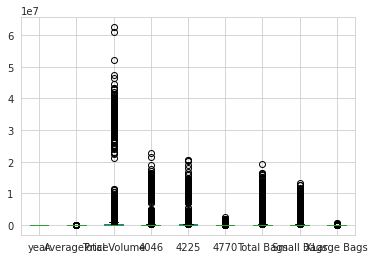

In [ ]:
boxplot = data.boxplot(column=[ 'year','AveragePrice','Total Volume','4046','4225','4770',
                             'Total Bags','Small Bags','XLarge Bags'])

In [ ]:
data.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [ ]:
data.shape

(18249, 14)

In [ ]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,18249.0,24.232232,1.548104e+01,0.00,10.00,24.00,38.00,52.00
AveragePrice,18249.0,1.405978,4.026766e-01,0.44,1.10,1.37,1.66,3.25
Total Volume,18249.0,850644.013009,3.453545e+06,84.56,10838.58,107376.76,432962.29,62505646.52
4046,18249.0,293008.424531,1.264989e+06,0.00,854.07,8645.30,111020.20,22743616.17
4225,18249.0,295154.568356,1.204120e+06,0.00,3008.78,29061.02,150206.86,20470572.61
4770,18249.0,22839.735993,1.074641e+05,0.00,0.00,184.99,6243.42,2546439.11
Total Bags,18249.0,239639.202060,9.862424e+05,0.00,5088.64,39743.83,110783.37,19373134.37
Small Bags,18249.0,182194.686696,7.461785e+05,0.00,2849.42,26362.82,83337.67,13384586.80
Large Bags,18249.0,54338.088145,2.439660e+05,0.00,127.47,2647.71,22029.25,5719096.61
XLarge Bags,18249.0,3106.426507,1.769289e+04,0.00,0.00,0.00,132.50,551693.65


In [ ]:
data.drop('Unnamed: 0', axis=1, inplace=True)

In [ ]:
data.isnull().sum()

Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          18249 non-null  object 
 1   AveragePrice  18249 non-null  float64
 2   Total Volume  18249 non-null  float64
 3   4046          18249 non-null  float64
 4   4225          18249 non-null  float64
 5   4770          18249 non-null  float64
 6   Total Bags    18249 non-null  float64
 7   Small Bags    18249 non-null  float64
 8   Large Bags    18249 non-null  float64
 9   XLarge Bags   18249 non-null  float64
 10  type          18249 non-null  object 
 11  year          18249 non-null  int64  
 12  region        18249 non-null  object 
dtypes: float64(9), int64(1), object(3)
memory usage: 1.8+ MB


In [ ]:
data['Date'] = data['Date'].apply(lambda x: datetime.strptime(x, '%Y-%m-%d'))

data['month'] = data['Date'].dt.month
data['day'] = data['Date'].dt.day

data['day_of_week'] = data['Date'].dt.dayofweek
dates = ['year', 'month', 'day', 'day_of_week']
data[dates]

,year,month,day,day_of_week
0,2015,12,27,6
1,2015,12,20,6
2,2015,12,13,6
3,2015,12,6,6
4,2015,11,29,6
...,...,...,...,...
18244,2018,2,4,6
18245,2018,1,28,6
18246,2018,1,21,6
18247,2018,1,14,6


In [ ]:
data.drop('day_of_week', axis=1, inplace=True)

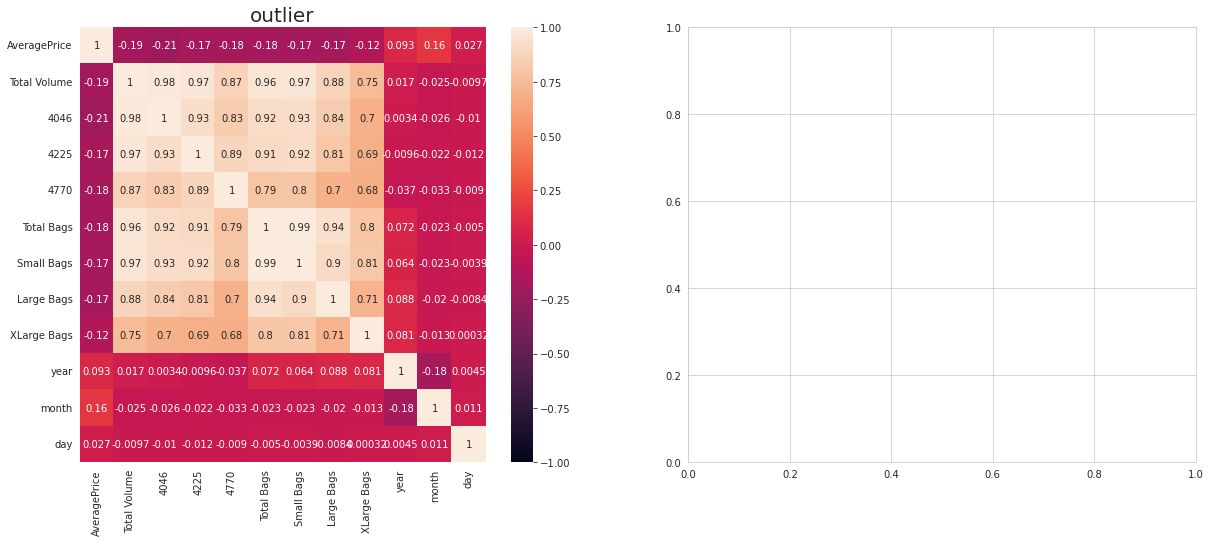

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(20,8))



sns.heatmap(data.corr(), vmin=-1, vmax=1,  annot=True, ax=ax[0])
ax[0].set_title('outlier', fontsize=20)



plt.show()


In [ ]:
scaler = Normalizer()
scaler.fit(data[['4046', 'AveragePrice']].values)
data['4046_scaled'] = scaler.transform(data[['4046', 'AveragePrice']].values)[:,0]
data['AveragePrice_scaled'] = scaler.transform(data[['4046', 'AveragePrice']].values)[:,1]



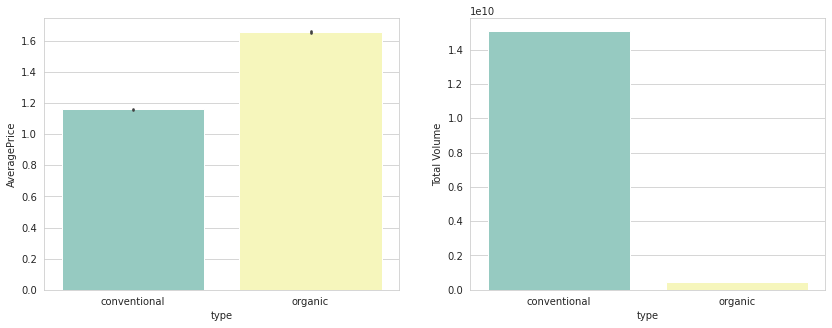

type
conventional    1.158040
organic         1.653999
Name: AveragePrice, dtype: float64

type
conventional    1.508722e+10
organic         4.361817e+08
Name: Total Volume, dtype: float64

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(14,5))

sns.barplot(x='type', y='AveragePrice', data=data, palette='Set3', ax=ax[0])
sns.barplot(x='type', y='Total Volume', data=data, palette='Set3', ax=ax[1], estimator=sum, ci=None)
plt.show()

display(data.groupby('type')['AveragePrice'].mean())
display(data.groupby('type')['Total Volume'].sum())

In [ ]:
data.columns

Index(['Date', 'AveragePrice', 'Total Volume', '4046', '4225', '4770',
       'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type', 'year',
       'region', 'month', 'day', '4046_scaled', 'AveragePrice_scaled'],
      dtype='object')

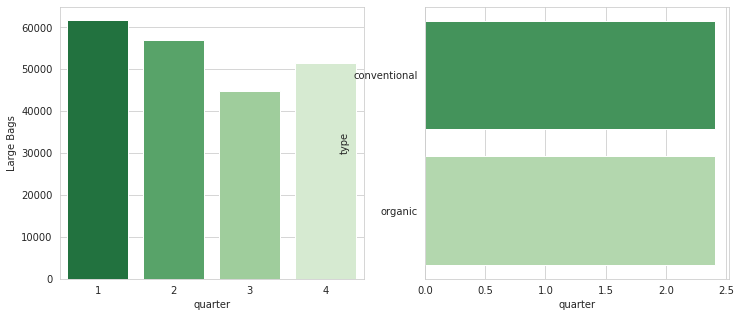

,Large Bags
quarter,
1,61762.686294
2,56896.458620
3,44874.525729
4,51604.839379


In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(12,5))

data['quarter'] = data['Date'].dt.quarter


sns.barplot(x='quarter', y='Large Bags', data=data, palette='Greens_r', ci=None, ax=ax[0])
sns.barplot(x='quarter', y='type', data=data, palette='Greens_r', ci=None, ax=ax[1])


plt.show()

quarter = data.groupby('quarter')[['Large Bags', 'type']].mean()
display(quarter)

## 8.1 Decision Tree Classifier

In [ ]:
dataTree = data.drop(['Date', 'region', '4046_scaled', 'AveragePrice_scaled'], axis=1)

target = dataTree['type']
features = dataTree.drop(['type'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(features.values, target.values, random_state=0)

tree = DecisionTreeClassifier(max_depth=7, random_state=0).fit(X_train, y_train)

print("training set score : {:.2f}".format(tree.score(X_train, y_train)))
print("test set score: {:.2f}".format(tree.score(X_test, y_test)))




training set score : 0.98
test set score: 0.97



## 9.1 Decision Tree Regressor


In [ ]:
#Predicting average price
data_model = data.drop(['Date', '4046_scaled', 'AveragePrice_scaled', 'type', 'region'], axis=1)
target = data_model['AveragePrice']
features = data_model.drop(['AveragePrice'], axis=1)

#

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(features.values, target.values, random_state=0)
tree = DecisionTreeRegressor(max_depth=14, random_state=0).fit(X_train, y_train)
print("training set score : {:.2f}".format(tree.score(X_train, y_train)))
print("test set score: {:.2f}".format(tree.score(X_test, y_test)))



training set score : 0.94
test set score: 0.70
